In [3]:
import preprocess

In [4]:
tst = [2023, 9, 1, 'AM']
ted = [2023, 9, 6, 'PM']
region = ('CONUS', [-126.401171875,24.071240929282325,
                    -61.36210937500001,49.40003415463647])

In [4]:
!tree ./processed

./processed
├── CONUS.json
├── NOAA20
│   ├── 20230906_AM.txt
│   └── 20230906_PM.txt
├── SNPP
│   ├── 20230906_AM.txt
│   └── 20230906_PM.txt
└── VIIRS
    └── CONUS
        ├── 20230906_AM.txt
        └── 20230906_PM.txt

4 directories, 7 files


## Once per region
Start by preprocessing the region to get rid of static flare sources. Save that new "swiss cheese" shape off into a geojson file for later.


In [7]:
preprocess.preprocess_region(region)

NameError: name 'preprocess_region' is not defined

In [ ]:
!tree ./processed

## Once per input file

Next process each NRT file into half day files. First we'll get all the times that are of interest. This could also be done by inspecting all looking at all the files that exist and seeing which have not been preprocessed yet.

In [9]:
import FireTime

list_of_ts = list(FireTime.t_generator(tst, ted))
list_of_ts[::2]

[[2023, 9, 1, 'AM'],
 [2023, 9, 2, 'AM'],
 [2023, 9, 3, 'AM'],
 [2023, 9, 4, 'AM'],
 [2023, 9, 5, 'AM'],
 [2023, 9, 6, 'AM']]

In [5]:
%%time
for sat in ["SNPP", "NOAA20"]:
    for t in list_of_ts[::2]:
        preprocess.preprocess_NRT_file(t, sat)

2024-01-24 12:39:46,594 - FireLog - INFO - preprocessing NRT file for 2023-9-1, SNPP
2024-01-24 12:39:46,945 - FireLog - INFO - func:preprocess_NRT_file took: 351.42 ms
2024-01-24 12:39:46,946 - FireLog - INFO - preprocessing NRT file for 2023-9-2, SNPP
2024-01-24 12:39:47,358 - FireLog - INFO - func:preprocess_NRT_file took: 412.10 ms
2024-01-24 12:39:47,358 - FireLog - INFO - preprocessing NRT file for 2023-9-3, SNPP
2024-01-24 12:39:47,687 - FireLog - INFO - func:preprocess_NRT_file took: 328.48 ms
2024-01-24 12:39:47,687 - FireLog - INFO - preprocessing NRT file for 2023-9-4, SNPP
2024-01-24 12:39:47,969 - FireLog - INFO - func:preprocess_NRT_file took: 282.35 ms
2024-01-24 12:39:47,970 - FireLog - INFO - preprocessing NRT file for 2023-9-5, SNPP
2024-01-24 12:39:48,266 - FireLog - INFO - func:preprocess_NRT_file took: 295.86 ms
2024-01-24 12:39:48,267 - FireLog - INFO - preprocessing NRT file for 2023-9-6, SNPP
2024-01-24 12:39:48,481 - FireLog - INFO - func:preprocess_NRT_file to

CPU times: user 3.6 s, sys: 271 ms, total: 3.88 s
Wall time: 3.9 s


In [6]:
!tree ./processed

./processed
├── CONUS.json
├── NOAA20
│   ├── 20230901_AM.txt
│   ├── 20230901_PM.txt
│   ├── 20230902_AM.txt
│   ├── 20230902_PM.txt
│   ├── 20230903_AM.txt
│   ├── 20230903_PM.txt
│   ├── 20230904_AM.txt
│   ├── 20230904_PM.txt
│   ├── 20230905_AM.txt
│   ├── 20230905_PM.txt
│   ├── 20230906_AM.txt
│   └── 20230906_PM.txt
├── SNPP
│   ├── 20230901_AM.txt
│   ├── 20230901_PM.txt
│   ├── 20230902_AM.txt
│   ├── 20230902_PM.txt
│   ├── 20230903_AM.txt
│   ├── 20230903_PM.txt
│   ├── 20230904_AM.txt
│   ├── 20230904_PM.txt
│   ├── 20230905_AM.txt
│   ├── 20230905_PM.txt
│   ├── 20230906_AM.txt
│   └── 20230906_PM.txt
└── VIIRS
    └── CONUS
        ├── 20230906_AM.txt
        └── 20230906_PM.txt

4 directories, 27 files


## Once per region and t

Do initial filtering and clustering using the preprocessed region and the half day files.

Note: for the purpose of timing I am running the full month, but each of these steps could run in a separate proccess.

In [8]:
region = preprocess.read_region(region)

2024-01-24 12:40:22,993 - FireLog - INFO - func:read_region took: 177.59 ms


CPU times: user 153 ms, sys: 27 ms, total: 180 ms
Wall time: 178 ms


In [10]:
%%time
for t in list_of_ts:
    preprocess.preprocess_region_t(t, sat="VIIRS", region=region)

2024-01-24 12:40:38,392 - FireLog - INFO - filtering and clustering 2023-9-1 AM, VIIRS, CONUS
2024-01-24 12:40:38,403 - FireLog - INFO - func:read_preprocessed took: 9.44 ms
2024-01-24 12:40:38,414 - FireLog - INFO - func:read_preprocessed took: 10.21 ms
2024-01-24 12:41:12,223 - FireLog - INFO - func:preprocess_region_t took: 33.83 sec
2024-01-24 12:41:12,224 - FireLog - INFO - filtering and clustering 2023-9-1 PM, VIIRS, CONUS
2024-01-24 12:41:12,268 - FireLog - INFO - func:read_preprocessed took: 44.26 ms
2024-01-24 12:41:12,304 - FireLog - INFO - func:read_preprocessed took: 34.67 ms
2024-01-24 12:41:29,577 - FireLog - INFO - func:preprocess_region_t took: 17.35 sec
2024-01-24 12:41:29,577 - FireLog - INFO - filtering and clustering 2023-9-2 AM, VIIRS, CONUS
2024-01-24 12:41:29,596 - FireLog - INFO - func:read_preprocessed took: 18.18 ms
2024-01-24 12:41:29,612 - FireLog - INFO - func:read_preprocessed took: 16.10 ms
2024-01-24 12:42:09,091 - FireLog - INFO - func:preprocess_region

CPU times: user 5min 33s, sys: 88.2 ms, total: 5min 34s
Wall time: 5min 34s


In [11]:
!tree ./processed

./processed
├── CONUS.json
├── NOAA20
│   ├── 20230901_AM.txt
│   ├── 20230901_PM.txt
│   ├── 20230902_AM.txt
│   ├── 20230902_PM.txt
│   ├── 20230903_AM.txt
│   ├── 20230903_PM.txt
│   ├── 20230904_AM.txt
│   ├── 20230904_PM.txt
│   ├── 20230905_AM.txt
│   ├── 20230905_PM.txt
│   ├── 20230906_AM.txt
│   └── 20230906_PM.txt
├── SNPP
│   ├── 20230901_AM.txt
│   ├── 20230901_PM.txt
│   ├── 20230902_AM.txt
│   ├── 20230902_PM.txt
│   ├── 20230903_AM.txt
│   ├── 20230903_PM.txt
│   ├── 20230904_AM.txt
│   ├── 20230904_PM.txt
│   ├── 20230905_AM.txt
│   ├── 20230905_PM.txt
│   ├── 20230906_AM.txt
│   └── 20230906_PM.txt
└── VIIRS
    └── CONUS
        ├── 20230901_AM.txt
        ├── 20230901_PM.txt
        ├── 20230902_AM.txt
        ├── 20230902_PM.txt
        ├── 20230903_AM.txt
        ├── 20230903_PM.txt
        ├── 20230904_AM.txt
        ├── 20230904_PM.txt
        ├── 20230905_AM.txt
        ├── 20230905_PM.txt
        ├── 20230906_AM.txt
        └── 20230906_PM.txt

4 directories, 3

## Use FireRun test

In [10]:
from FireRun import CONUSrunNRT

allfires = CONUSrunNRT()

2024-01-24 16:46:47,061 - FireLog - INFO - STARTING RUN FOR CONUS
2024-01-24 16:46:47,239 - FireLog - INFO - func:read_region took: 177.43 ms
2024-01-24 16:46:47,240 - FireLog - INFO - --------------------
2024-01-24 16:46:47,240 - FireLog - INFO - Fire tracking at [2023, 9, 1, 'AM']
2024-01-24 16:46:47,243 - FireLog - INFO - func:read_preprocessed took: 2.34 ms
2024-01-24 16:46:48,584 - FireLog - INFO - func:Fire_expand_rtree took: 1.34 sec
2024-01-24 16:46:48,751 - FireLog - INFO - func:Fire_merge_rtree took: 166.07 ms
2024-01-24 16:46:48,758 - FireLog - INFO - func:invalidate_statfires took: 5.67 ms
2024-01-24 16:46:48,758 - FireLog - INFO - fids_expand: 0
2024-01-24 16:46:48,759 - FireLog - INFO - fids_new: 529
2024-01-24 16:46:48,759 - FireLog - INFO - fids_merged: 40
2024-01-24 16:46:48,759 - FireLog - INFO - fids_invalid: 51
2024-01-24 16:46:48,760 - FireLog - INFO - --------------------
2024-01-24 16:46:48,760 - FireLog - INFO - Fire tracking at [2023, 9, 1, 'PM']
2024-01-24 16

From the logs that Eli shared we expect that for [2023, 9, 6, 'AM'] we should have:

```python
actual_fids_expand = 260
actual_fids_new = 131
actual_fids_merged = 6
actual_fids_invalid = 44
```

In [11]:
allfires

<Allfires at t=[2023, 9, 6, 'PM'] with n_fires=2841>

Find a big fire

In [35]:
{fid: fire.n_pixels for fid, fire in allfires.fires.items() if fire.n_pixels > 100}

{58: 126, 102: 136, 103: 128, 549: 122, 665: 230, 890: 103}

In [36]:
allfires.fires[665].pixels

,Lat,Lon,FRP,Sat,DT,DS,YYYYMMDD_HHMM,ampm,x,y,initial_cid,origin,new_at
0,30.85326,-95.63076,99.37,SNPP,0.72,0.63,2023-09-01 20:25:00,PM,420085.493236,-1.558444e+06,182,-1,2023-09-01 12:00:00
1,30.85356,-95.62389,99.37,SNPP,0.72,0.63,2023-09-01 20:25:00,PM,420743.824203,-1.558378e+06,182,-1,2023-09-01 12:00:00
2,30.85940,-95.62579,12.64,NOAA20,0.37,0.41,2023-09-01 19:34:00,PM,420533.068390,-1.557743e+06,182,-1,2023-09-01 12:00:00
3,30.84622,-95.63727,17.36,SNPP,0.72,0.63,2023-09-01 20:25:00,PM,419494.281308,-1.559252e+06,183,-1,2023-09-01 12:00:00
4,30.84652,-95.63036,14.89,SNPP,0.72,0.63,2023-09-01 20:25:00,PM,420156.513180,-1.559185e+06,183,-1,2023-09-01 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,30.85362,-95.69576,2.30,SNPP,0.42,0.54,2023-09-03 08:30:00,AM,413841.115513,-1.558718e+06,262,-1,2023-09-03 00:00:00
226,30.85412,-95.69437,2.80,SNPP,0.42,0.54,2023-09-03 08:30:00,AM,413972.231499,-1.558657e+06,262,-1,2023-09-03 00:00:00
227,30.83579,-95.63691,11.78,SNPP,0.42,0.53,2023-09-03 19:49:00,PM,419579.229226,-1.560401e+06,153,-1,2023-09-03 12:00:00
228,30.84481,-95.66108,16.01,SNPP,0.42,0.53,2023-09-03 19:49:00,PM,417214.155409,-1.559523e+06,156,-1,2023-09-03 12:00:00


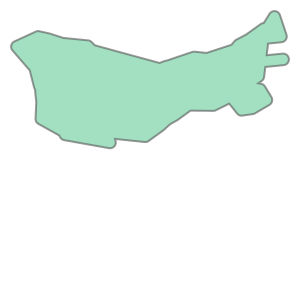

In [37]:
allfires.fires[665].hull

## Experiments with saving fire data

In [26]:
%%time

from FireConsts import firesrc
import os
OUTPUT_DIR = "processed/"

for fid, fire in allfires.fires.items():
    fire_filename = f"{fid=}.txt"
    output_filepath = os.path.join(OUTPUT_DIR, firesrc, region[0], "fires", fire_filename)
    
    # make nested path if necessary
    os.makedirs(os.path.dirname(output_filepath), exist_ok=True)

    fire.pixels.to_csv(output_filepath, index=False)

CPU times: user 946 ms, sys: 75.8 ms, total: 1.02 s
Wall time: 1.02 s


## Experiments with land cover

In [5]:
from FireConsts import dirextdata

import rasterio
import pyproj
import os

In [63]:
%%time
# read NLCD 500m data
fnmLCT = os.path.join(dirextdata, "NLCD", f"nlcd_export_510m_simplified_latlon.tif")
dataset = rasterio.open(fnmLCT)
samps = list(dataset.sample(fire.newlocs_geo))
vLCT = [s[0] for s in samps]
vLCT

298 µs ± 1.81 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [53]:
%%time
# read NLCD 500m data
fnmLCT = os.path.join(dirextdata, "NLCD", f"nlcd_export_510m_simplified_{epsg}.tif")
dataset = rasterio.open(fnmLCT)
samps = list(dataset.sample(fire.newlocs))
vLCT = [s[0] for s in samps]
vLCT

CPU times: user 3.24 ms, sys: 0 ns, total: 3.24 ms
Wall time: 3.26 ms


[42, 82, 82, 82, 52, 82, 42]

In [57]:
%%time

locs = fire.newlocs_geo
# read NLCD 500m data
fnmLCT = os.path.join(dirextdata, "NLCD", "nlcd_export_510m_simplified.tif")
dataset = rasterio.open(fnmLCT)
transformer = pyproj.Transformer.from_crs("epsg:4326", dataset.crs)
locs_crs_x, locs_crs_y = transformer.transform(
    # NOTE: EPSG 4326 expected coordinate order latitude, longitude, but
    # `locs` is x (longitude), y (latitude). That's why `l[1]`, then `l[0]`
    # here.
    [l[1] for l in locs],
    [l[0] for l in locs]
)
locs_crs = list(zip(locs_crs_x, locs_crs_y))
samps = list(dataset.sample(locs_crs))
vLCT = [int(s) for s in samps]
vLCT

CPU times: user 43 ms, sys: 0 ns, total: 43 ms
Wall time: 42.2 ms


<timed exec>:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)


[82, 82, 82, 82, 82, 82, 82]

## Run the rest of the algorithm

Now you have pre-clustered data at the half day for the region.

In [ ]:
df = read_preprocessed(t, sat, region=region)
df.head()

## Experiments with hulls

Trying out next steps around hulls:

In [ ]:
from FireObj import Cluster, FirePixel
from FireVector import *

In [ ]:
%%time
for d in range(1, 32):
    for ampm in ("AM", "PM"):
        df = read_preprocessed((t[0], t[1], d, ampm), sat, region=region)
        for ic, pixels in df.groupby("initial_cid"):
            hull = cal_hull(pixels[["x", "y"]].values, sensor="viirs")

In [ ]:
biggest_cluster = df.value_counts("initial_cid").index[0]
pixels = df[df["initial_cid"] == biggest_cluster].copy()
pixel_locs = pixels[["x", "y"]].values
hull = cal_hull(pixel_locs, sensor="viirs")

In [ ]:
from utils import timed

In [ ]:
# compute initial hulls
hulls = dict()
for ic, subset in df.groupby("initial_cid"):
    pixel_locs = subset[["x", "y"]].values
    hulls[ic] = cal_hull(pixel_locs, sensor="viirs")

# store hulls
df = pd.merge(df, pd.Series(hulls, name="hull"), how="outer", left_on="initial_cid", right_index=True)